# Evolution Strategies

So far, we have only performed one random step every time 
In this part we are going to use evolution strategies to optimize our models.
Evolution strategies often use multiple samples to compare different mutations.
These mutations are compared, selected or graded in a certain way.

We are going to train the same linear regression model on the Boston houses dataset.



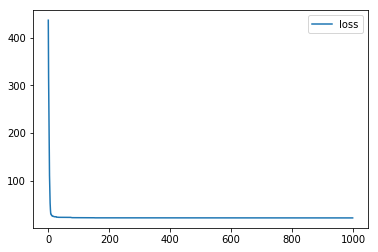

loss:  21.89786224558319


In [2]:
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

boston = datasets.load_boston()

X = boston['data']
y = boston['target']
X = StandardScaler().fit_transform(X)

def mse(y_true, y_pred):
    return np.average(np.square(y_true - y_pred))

def log_reg(weights, bias):
    y_pred = X.dot(weights) + bias
    return -mse(y, y_pred)

npop = 512 # population size
sigma = 0.5 # noise standard deviation
lr = 1.0 # learning rate

W = np.zeros(X.shape[1])
b = np.array([0])

W_moment = np.zeros(X.shape[1])
b_moment = np.array([0.0])

lr_decay = 0.995

num_iters = 1000

loss_history = []
R_start = log_reg(W, b)
for i in range(num_iters):
    # initialize memory for a population of w's, and their rewards
    N_W = np.random.randn(npop, W.shape[0])
    N_b = np.random.randn(npop, 1) # samples from a normal distribution N(0,1)
    R = np.zeros(npop)
    for j in range(npop):
        W_try = W + sigma * N_W[j]
        b_try = b + sigma * N_b[j] 
        R[j] = log_reg(W_try, b_try)

    R_max = np.argmax(R)
    best_W = N_W[R_max]
    best_b = N_b[R_max]

    W_2 = best_W * lr
    b_2 = best_b * lr

    if log_reg(W + W_2, b + b_2) >= R_start:
        W = W + W_2
        b = b + b_2
    R_start = log_reg(W, b)

    loss_history.append(R_start)
    lr *= lr_decay

loss_line, = plt.plot(-np.array(loss_history), label='loss')
plt.legend(handles=[loss_line])
plt.show()
print("loss: ", -loss_history[-1])

# References
https://blog.openai.com/evolution-strategies/

https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d